In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn

In [2]:
test_data=pd.read_csv('test.csv')

In [3]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
train_data=pd.read_csv('train.csv')

In [5]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
all_features=pd.concat((train_data.iloc[:,1:-2],test_data.iloc[:,1:-1]),0)

In [8]:
all_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Cabin         12671 non-null  object 
 3   Destination   12696 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  object 
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
dtypes: float64(6), object(5)
memory usage: 1.2+ MB


# Data Standardization & Missing Data Processing

In [9]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
print(numeric_features)
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
all_features[numeric_features] = all_features[numeric_features].fillna(0)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


In [10]:
all_features

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,B/0/P,TRAPPIST-1e,0.710909,False,-0.344192,-0.285263,-0.296170,-0.272921,-0.259970
1,Earth,False,F/0/S,TRAPPIST-1e,-0.331680,False,-0.175878,-0.279582,-0.253838,0.212800,-0.222685
2,Europa,False,A/0/S,TRAPPIST-1e,2.031522,True,-0.277793,1.971785,-0.296170,5.668087,-0.218448
3,Europa,False,A/0/S,TRAPPIST-1e,0.293873,False,-0.344192,0.524523,0.332048,2.672368,-0.096424
4,Earth,False,F/1/S,TRAPPIST-1e,-0.887728,False,0.123691,-0.241081,-0.040480,0.226955,-0.258275
...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,0.363379,False,-0.344192,-0.285263,-0.296170,-0.272921,-0.259970
4273,Earth,False,NaN,TRAPPIST-1e,0.919427,False,-0.344192,0.249335,-0.267384,-0.264074,-0.137946
4274,Mars,True,D/296/P,55 Cancri e,0.000000,False,-0.344192,-0.285263,-0.296170,-0.272921,-0.259970
4275,Europa,False,D/297/P,NaN,0.000000,False,-0.344192,1.406261,-0.296170,-0.272921,0.183214


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='muted')
import warnings
warnings.filterwarnings('ignore')

In [12]:
all_features['Cabin'].unique().shape

(9826,)

In [13]:
def process_missing(df):
    df['VIP'] = df['VIP'].fillna(False)
    df['CryoSleep'] = df['CryoSleep'].fillna(False)
    df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
    df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
    
    for column in ['VIP','CryoSleep']:
        df[column]=df[column].replace({True : 1 , False : 0})
    del df['Cabin']       #  do not know how to use information in 'Cabin'
    return df

all_features = process_missing(all_features)

In [14]:
all_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  object 
 1   CryoSleep     12970 non-null  int64  
 2   Destination   12970 non-null  object 
 3   Age           12970 non-null  float64
 4   VIP           12970 non-null  int64  
 5   RoomService   12970 non-null  float64
 6   FoodCourt     12970 non-null  float64
 7   ShoppingMall  12970 non-null  float64
 8   Spa           12970 non-null  float64
 9   VRDeck        12970 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 1.1+ MB


In [15]:
# one-hot
all_features = pd.get_dummies(all_features)
all_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  12970 non-null  int64  
 1   Age                        12970 non-null  float64
 2   VIP                        12970 non-null  int64  
 3   RoomService                12970 non-null  float64
 4   FoodCourt                  12970 non-null  float64
 5   ShoppingMall               12970 non-null  float64
 6   Spa                        12970 non-null  float64
 7   VRDeck                     12970 non-null  float64
 8   HomePlanet_Earth           12970 non-null  uint8  
 9   HomePlanet_Europa          12970 non-null  uint8  
 10  HomePlanet_Mars            12970 non-null  uint8  
 11  Destination_55 Cancri e    12970 non-null  uint8  
 12  Destination_PSO J318.5-22  12970 non-null  uint8  
 13  Destination_TRAPPIST-1e    12970 non-null  uint

In [16]:
all_features

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0.710909,0,-0.344192,-0.285263,-0.296170,-0.272921,-0.259970,0,1,0,0,0,1
1,0,-0.331680,0,-0.175878,-0.279582,-0.253838,0.212800,-0.222685,1,0,0,0,0,1
2,0,2.031522,1,-0.277793,1.971785,-0.296170,5.668087,-0.218448,0,1,0,0,0,1
3,0,0.293873,0,-0.344192,0.524523,0.332048,2.672368,-0.096424,0,1,0,0,0,1
4,0,-0.887728,0,0.123691,-0.241081,-0.040480,0.226955,-0.258275,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,0.363379,0,-0.344192,-0.285263,-0.296170,-0.272921,-0.259970,1,0,0,0,0,1
4273,0,0.919427,0,-0.344192,0.249335,-0.267384,-0.264074,-0.137946,1,0,0,0,0,1
4274,1,0.000000,0,-0.344192,-0.285263,-0.296170,-0.272921,-0.259970,0,0,1,1,0,0
4275,0,0.000000,0,-0.344192,1.406261,-0.296170,-0.272921,0.183214,0,1,0,0,0,1


In [17]:
clean_train = all_features.iloc[:8693,:]
# print(clean_train)
clean_test = all_features.iloc[8693:,:]

In [18]:
torch.tensor(clean_train.to_numpy(),dtype=torch.float32).shape

torch.Size([8693, 14])

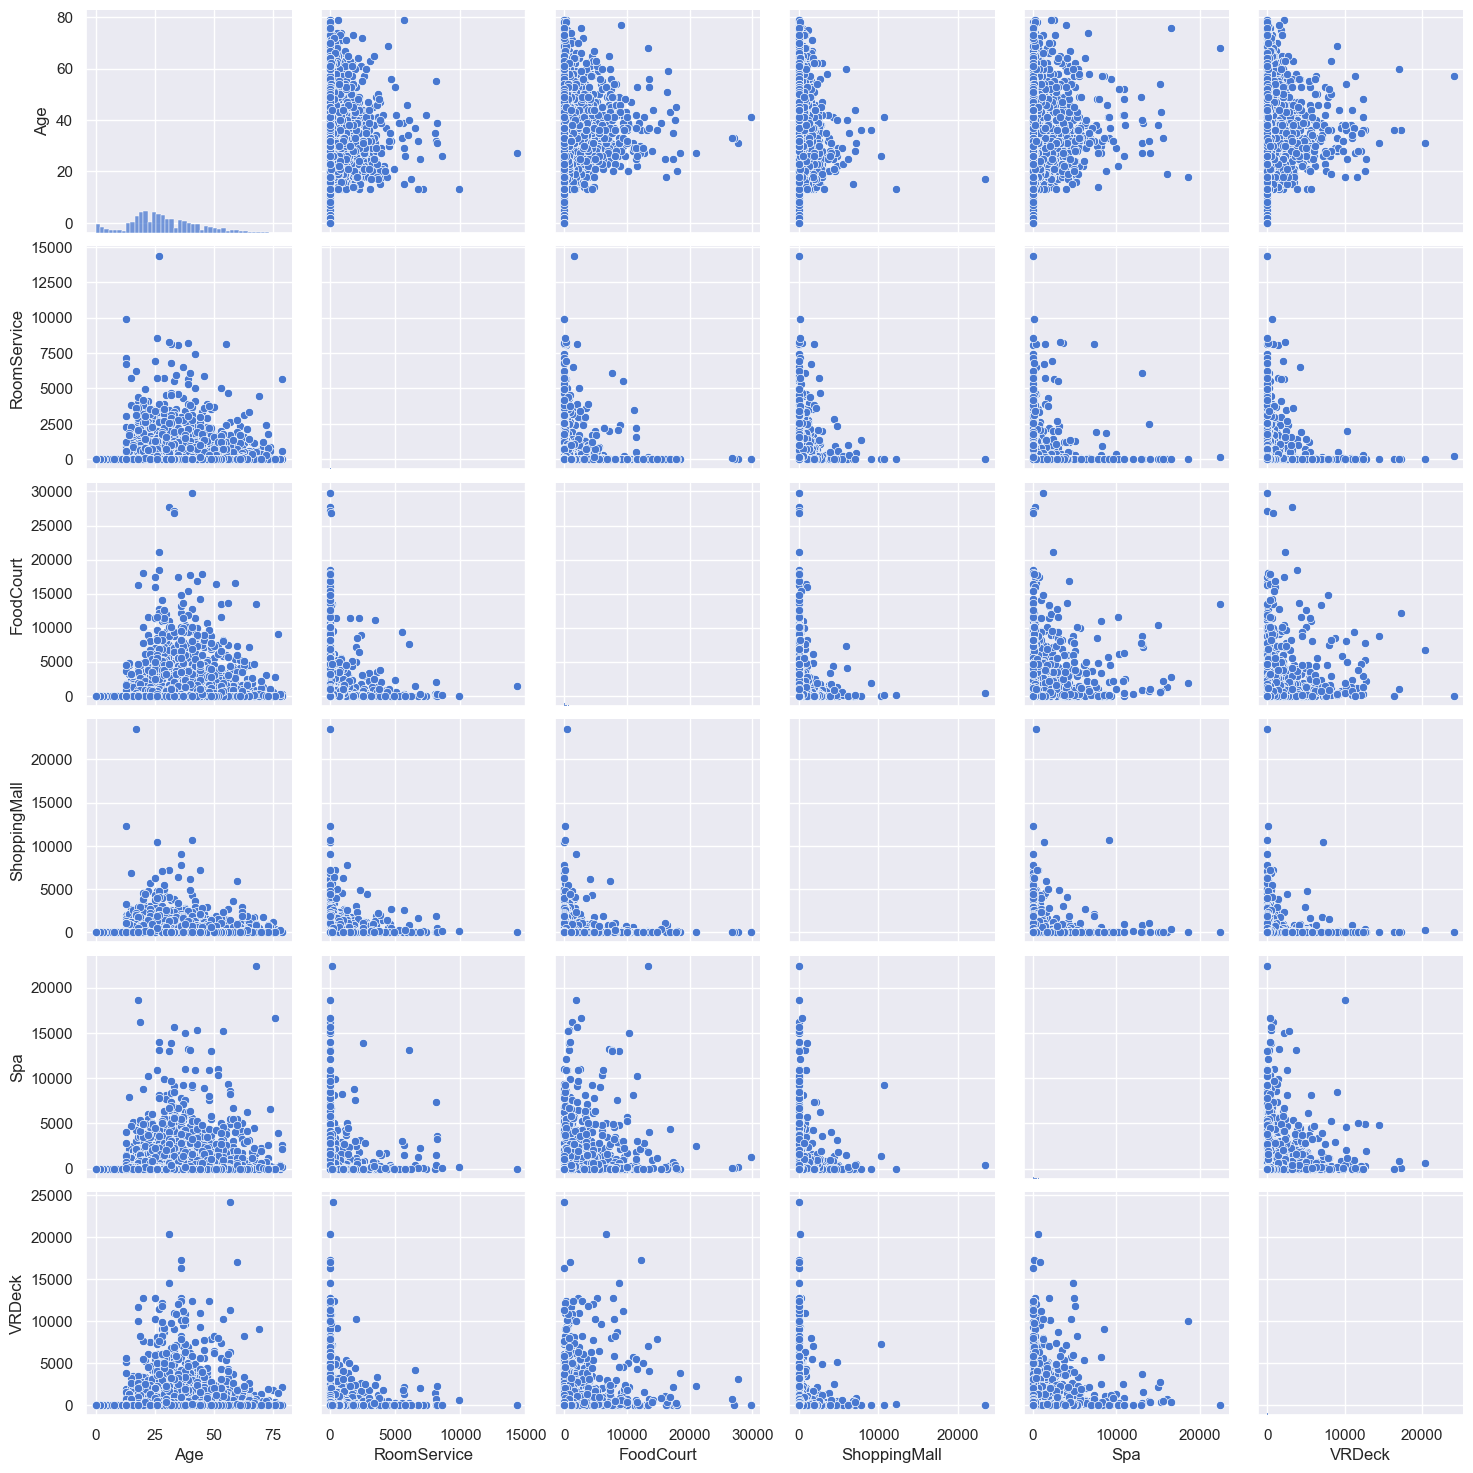

In [19]:
cols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
sns.pairplot(train_data[cols], size=2.5)

In [20]:
from torch.utils.data import DataLoader, TensorDataset
train_data.iloc[:,-1]

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [21]:
train_dataset = TensorDataset(torch.tensor(clean_train.to_numpy(),dtype=torch.float32), torch.tensor(train_data.iloc[:,-1].to_numpy()).to(torch.long))
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)



Fold 1/5
Epoch [1/150], Average Loss: 0.7037
Epoch [2/150], Average Loss: 0.6425
Epoch [3/150], Average Loss: 0.6066
Epoch [4/150], Average Loss: 0.5843
Epoch [5/150], Average Loss: 0.5697
Epoch [6/150], Average Loss: 0.5616
Epoch [7/150], Average Loss: 0.5555
Epoch [8/150], Average Loss: 0.5495
Epoch [9/150], Average Loss: 0.5440
Epoch [10/150], Average Loss: 0.5420
Epoch [11/150], Average Loss: 0.5375
Epoch [12/150], Average Loss: 0.5357
Epoch [13/150], Average Loss: 0.5331
Epoch [14/150], Average Loss: 0.5302
Epoch [15/150], Average Loss: 0.5298
Epoch [16/150], Average Loss: 0.5279
Epoch [17/150], Average Loss: 0.5270
Epoch [18/150], Average Loss: 0.5260
Epoch [19/150], Average Loss: 0.5239
Epoch [20/150], Average Loss: 0.5225
Epoch [21/150], Average Loss: 0.5213
Epoch [22/150], Average Loss: 0.5236
Epoch [23/150], Average Loss: 0.5227
Epoch [24/150], Average Loss: 0.5226
Epoch [25/150], Average Loss: 0.5205
Epoch [26/150], Average Loss: 0.5212
Epoch [27/150], Average Loss: 0.5201


Epoch [71/150], Average Loss: 0.5088
Epoch [72/150], Average Loss: 0.5108
Epoch [73/150], Average Loss: 0.5120
Epoch [74/150], Average Loss: 0.5099
Epoch [75/150], Average Loss: 0.5089
Epoch [76/150], Average Loss: 0.5091
Epoch [77/150], Average Loss: 0.5085
Epoch [78/150], Average Loss: 0.5100
Epoch [79/150], Average Loss: 0.5107
Epoch [80/150], Average Loss: 0.5117
Epoch [81/150], Average Loss: 0.5124
Epoch [82/150], Average Loss: 0.5092
Epoch [83/150], Average Loss: 0.5098
Epoch [84/150], Average Loss: 0.5107
Epoch [85/150], Average Loss: 0.5118
Epoch [86/150], Average Loss: 0.5096
Epoch [87/150], Average Loss: 0.5105
Epoch [88/150], Average Loss: 0.5104
Epoch [89/150], Average Loss: 0.5103
Epoch [90/150], Average Loss: 0.5078
Epoch [91/150], Average Loss: 0.5094
Epoch [92/150], Average Loss: 0.5095
Epoch [93/150], Average Loss: 0.5109
Epoch [94/150], Average Loss: 0.5109
Epoch [95/150], Average Loss: 0.5083
Epoch [96/150], Average Loss: 0.5066
Epoch [97/150], Average Loss: 0.5079
E

Epoch [141/150], Average Loss: 0.5057
Epoch [142/150], Average Loss: 0.5082
Epoch [143/150], Average Loss: 0.5069
Epoch [144/150], Average Loss: 0.5075
Epoch [145/150], Average Loss: 0.5053
Epoch [146/150], Average Loss: 0.5068
Epoch [147/150], Average Loss: 0.5051
Epoch [148/150], Average Loss: 0.5059
Epoch [149/150], Average Loss: 0.5105
Epoch [150/150], Average Loss: 0.5109
Validation Loss for Fold 3: 0.5146

Fold 4/5
Epoch [1/150], Average Loss: 0.6859
Epoch [2/150], Average Loss: 0.6304
Epoch [3/150], Average Loss: 0.5963
Epoch [4/150], Average Loss: 0.5756
Epoch [5/150], Average Loss: 0.5650
Epoch [6/150], Average Loss: 0.5554
Epoch [7/150], Average Loss: 0.5515
Epoch [8/150], Average Loss: 0.5458
Epoch [9/150], Average Loss: 0.5401
Epoch [10/150], Average Loss: 0.5382
Epoch [11/150], Average Loss: 0.5371
Epoch [12/150], Average Loss: 0.5339
Epoch [13/150], Average Loss: 0.5335
Epoch [14/150], Average Loss: 0.5299
Epoch [15/150], Average Loss: 0.5282
Epoch [16/150], Average Loss:

Epoch [60/150], Average Loss: 0.5122
Epoch [61/150], Average Loss: 0.5095
Epoch [62/150], Average Loss: 0.5103
Epoch [63/150], Average Loss: 0.5113
Epoch [64/150], Average Loss: 0.5115
Epoch [65/150], Average Loss: 0.5107
Epoch [66/150], Average Loss: 0.5107
Epoch [67/150], Average Loss: 0.5094
Epoch [68/150], Average Loss: 0.5090
Epoch [69/150], Average Loss: 0.5089
Epoch [70/150], Average Loss: 0.5113
Epoch [71/150], Average Loss: 0.5075
Epoch [72/150], Average Loss: 0.5096
Epoch [73/150], Average Loss: 0.5102
Epoch [74/150], Average Loss: 0.5090
Epoch [75/150], Average Loss: 0.5105
Epoch [76/150], Average Loss: 0.5076
Epoch [77/150], Average Loss: 0.5104
Epoch [78/150], Average Loss: 0.5101
Epoch [79/150], Average Loss: 0.5088
Epoch [80/150], Average Loss: 0.5093
Epoch [81/150], Average Loss: 0.5080
Epoch [82/150], Average Loss: 0.5082
Epoch [83/150], Average Loss: 0.5087
Epoch [84/150], Average Loss: 0.5117
Epoch [85/150], Average Loss: 0.5096
Epoch [86/150], Average Loss: 0.5086
E

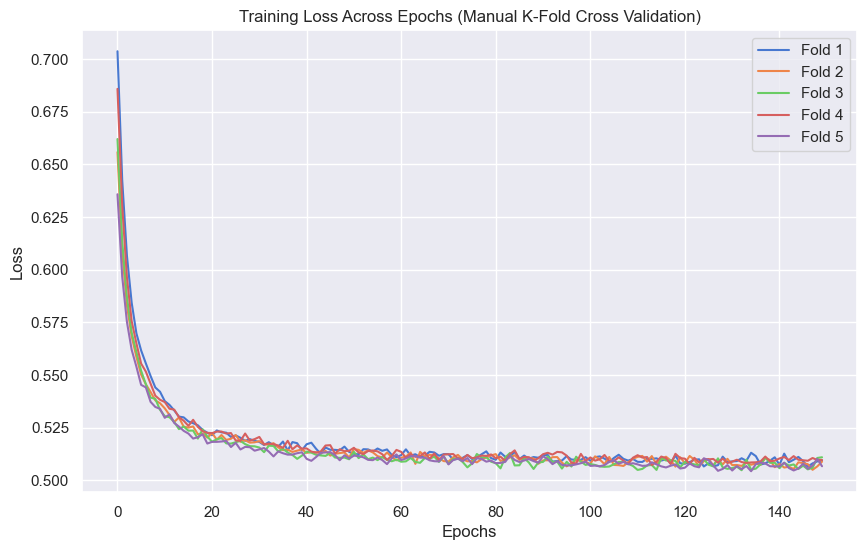

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset


k_folds = 5
num_samples = len(clean_train) 
indices = torch.randperm(num_samples).tolist() 

fold_size = num_samples // k_folds

all_train_losses = []

for fold in range(k_folds):
    print(f"\nFold {fold + 1}/{k_folds}")
    
    val_start = fold * fold_size
    val_end = (fold + 1) * fold_size if fold < k_folds - 1 else num_samples
    val_indices = indices[val_start:val_end]
    val_data_fold = clean_train.iloc[val_indices]
    val_labels_fold = train_data.iloc[val_indices, -1]
    
    train_indices = indices[:val_start] + indices[val_end:]
    train_data_fold = clean_train.iloc[train_indices]
    train_labels_fold = train_data.iloc[train_indices, -1]
    
    # Dataset
    train_dataset = TensorDataset(
        torch.tensor(train_data_fold.to_numpy(), dtype=torch.float32), 
        torch.tensor(train_labels_fold.to_numpy()).to(torch.long)
    )
    val_dataset = TensorDataset(
        torch.tensor(val_data_fold.to_numpy(), dtype=torch.float32), 
        torch.tensor(val_labels_fold.to_numpy()).to(torch.long)
    )
    
    # DataLoader
    train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)
    

    net = nn.Sequential(
        nn.Linear(14, 2),       
#         nn.ReLU(),
#         nn.Linear(32,2),
#         nn.ReLU(),
        nn.Softmax(dim=1)       
    )
    optimizer = optim.Adam(net.parameters(), lr=0.005)
    
    criterion = nn.CrossEntropyLoss()
    
    num_epochs = 150
    train_losses = []

    for epoch in range(num_epochs):
        net.train()  
        running_loss = 0.0     
        for i, (inputs, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            loss.backward()
            optimizer.step()

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')
    
    all_train_losses.append(train_losses)
    
    net.eval()  
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(val_loader)
    print(f'Validation Loss for Fold {fold + 1}: {avg_val_loss:.4f}')

plt.figure(figsize=(10, 6))
for fold, losses in enumerate(all_train_losses):
    plt.plot(losses, label=f'Fold {fold + 1}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Across Epochs (Manual K-Fold Cross Validation)')
plt.legend()
plt.show()


In [27]:
pred = net(torch.tensor(clean_test.to_numpy(),dtype=torch.float32))

In [28]:
pred.shape

torch.Size([4277, 2])

In [29]:
pred_classes = torch.argmax(pred, dim=1)
print(pred_classes)

tensor([1, 0, 1,  ..., 1, 1, 1])


In [30]:
pred_bool = pred_classes == 1  
print(pred_bool.sum())
pred_bool_series = pd.Series(pred_bool)

result = pd.concat([test_data['PassengerId'], pred_bool_series], axis=1)

result.columns = ['PassengerId', 'Transported']
print(result)

tensor(2371)
     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]


In [31]:
result.to_csv('predictions2.csv', index=False)
print("CSV file has been saved as 'predictions2.csv'.")

CSV file has been saved as 'predictions2.csv'.
